In [5]:
from torchviz import make_dot
from models.deep_cnn import DeepCNN
from models.simple_cnn import SimpleCNN
from models.cnn_with_fc import CNNWithFC
import torch


'simplecnn.png'

# Good ones

In [15]:
from graphviz import Digraph

def draw_model_two_rows():
    dot = Digraph(format="png")
    dot.attr(dpi="300")  # High resolution
    dot.attr(rankdir="LR", size="10,6")  # Layout left to right

    # Nodes
    dot.node("Input", "Input (3x32x32)")
    dot.node("Conv1", "Conv2d (3→32, 3x3)")
    dot.node("ReLU", "ReLU")
    dot.node("Pool", "MaxPool2d (2x2)")
    dot.node("Flatten", "Flatten")
    dot.node("Dropout", "Dropout (p=0.5)")
    dot.node("FC1", "Linear (8192→10)")
    dot.node("Output", "Output (10)")

    # Edges
    dot.edge("Input", "Conv1")
    dot.edge("Conv1", "ReLU")
    dot.edge("ReLU", "Pool")
    dot.edge("Pool", "Flatten")
    dot.edge("Flatten", "Dropout")
    dot.edge("Dropout", "FC1")
    dot.edge("FC1", "Output")

    # Arrange into two rows using invisible nodes and rank grouping
    with dot.subgraph() as s:
        s.attr(rank="same")
        s.node("Input")
        s.node("Conv1")
        s.node("ReLU")
        s.node("Pool")

    with dot.subgraph() as s:
        s.attr(rank="same")
        s.node("Flatten")
        s.node("Dropout")
        s.node("FC1")
        s.node("Output")

    dot.render("cnn_layer_diagram_2rows", cleanup=True)
    print("Two-row diagram saved as cnn_layer_diagram_2rows.png")

draw_model_two_rows()


Two-row diagram saved as cnn_layer_diagram_2rows.png


In [16]:
from graphviz import Digraph

def draw_cnn_with_fc():
    dot = Digraph(format="png")
    dot.attr(dpi="300")
    dot.attr(rankdir="LR", size="12,6")

    # Nodes
    dot.node("Input", "Input (3x32x32)")
    dot.node("Conv1", "Conv2d (3→32, 3x3)")
    dot.node("Pool", "MaxPool2d (2x2)")
    dot.node("Flatten", "Flatten")
    dot.node("FC1", "Linear (8192→128)")
    dot.node("ReLU", "ReLU")
    dot.node("Dropout", "Dropout (p=0.5)")
    dot.node("FC2", "Linear (128→10)")
    dot.node("Output", "Output (10)")

    # Edges
    dot.edge("Input", "Conv1")
    dot.edge("Conv1", "Pool")
    dot.edge("Pool", "Flatten")
    dot.edge("Flatten", "FC1")
    dot.edge("FC1", "ReLU")
    dot.edge("ReLU", "Dropout")
    dot.edge("Dropout", "FC2")
    dot.edge("FC2", "Output")

    # Two-row layout
    with dot.subgraph() as s:
        s.attr(rank="same")
        s.node("Input")
        s.node("Conv1")
        s.node("Pool")
        s.node("Flatten")

    with dot.subgraph() as s:
        s.attr(rank="same")
        s.node("FC1")
        s.node("ReLU")
        s.node("Dropout")
        s.node("FC2")
        s.node("Output")

    dot.render("cnn_with_fc_2rows", cleanup=True)
    print("Diagram saved as cnn_with_fc_2rows.png")

draw_cnn_with_fc()


Diagram saved as cnn_with_fc_2rows.png


In [17]:
from graphviz import Digraph

def draw_deep_cnn():
    dot = Digraph(format="png")
    dot.attr(dpi="300")
    dot.attr(rankdir="LR", size="14,8")

    # Layer nodes
    dot.node("Input", "Input (3x32x32)")

    # Conv Block 1
    dot.node("Conv1", "Conv2d (3→64)")
    dot.node("ReLU1", "ReLU")
    dot.node("Conv2", "Conv2d (64→128)")
    dot.node("ReLU2", "ReLU")
    dot.node("Pool1", "MaxPool2d (2x2)")

    # Conv Block 2 & 3
    dot.node("Conv3", "Conv2d (128→256)")
    dot.node("ReLU3", "ReLU")
    dot.node("Conv4", "Conv2d (256→512)")
    dot.node("ReLU4", "ReLU")
    dot.node("Pool2", "MaxPool2d (2x2)")
    dot.node("Conv5", "Conv2d (512→512)")
    dot.node("ReLU5", "ReLU")
    dot.node("Pool3", "MaxPool2d (2x2)")

    # Fully connected block
    dot.node("Flatten", "Flatten")
    dot.node("FC1", "Linear (8192→1024)")
    dot.node("ReLU6", "ReLU")
    dot.node("Dropout1", "Dropout (p=0.3)")
    dot.node("FC2", "Linear (1024→512)")
    dot.node("ReLU7", "ReLU")
    dot.node("Dropout2", "Dropout (p=0.4)")
    dot.node("FC3", "Linear (512→10)")
    dot.node("Output", "Output (10)")

    # Edges
    dot.edge("Input", "Conv1")
    dot.edge("Conv1", "ReLU1")
    dot.edge("ReLU1", "Conv2")
    dot.edge("Conv2", "ReLU2")
    dot.edge("ReLU2", "Pool1")

    dot.edge("Pool1", "Conv3")
    dot.edge("Conv3", "ReLU3")
    dot.edge("ReLU3", "Conv4")
    dot.edge("Conv4", "ReLU4")
    dot.edge("ReLU4", "Pool2")
    dot.edge("Pool2", "Conv5")
    dot.edge("Conv5", "ReLU5")
    dot.edge("ReLU5", "Pool3")

    dot.edge("Pool3", "Flatten")
    dot.edge("Flatten", "FC1")
    dot.edge("FC1", "ReLU6")
    dot.edge("ReLU6", "Dropout1")
    dot.edge("Dropout1", "FC2")
    dot.edge("FC2", "ReLU7")
    dot.edge("ReLU7", "Dropout2")
    dot.edge("Dropout2", "FC3")
    dot.edge("FC3", "Output")

    # Layout with three horizontal levels
    with dot.subgraph() as s:
        s.attr(rank="same")
        s.node("Input")
        s.node("Conv1")
        s.node("ReLU1")
        s.node("Conv2")
        s.node("ReLU2")
        s.node("Pool1")

    with dot.subgraph() as s:
        s.attr(rank="same")
        s.node("Conv3")
        s.node("ReLU3")
        s.node("Conv4")
        s.node("ReLU4")
        s.node("Pool2")
        s.node("Conv5")
        s.node("ReLU5")
        s.node("Pool3")

    with dot.subgraph() as s:
        s.attr(rank="same")
        s.node("Flatten")
        s.node("FC1")
        s.node("ReLU6")
        s.node("Dropout1")
        s.node("FC2")
        s.node("ReLU7")
        s.node("Dropout2")
        s.node("FC3")
        s.node("Output")

    dot.render("deep_cnn_architecture", cleanup=True)
    print("Diagram saved as deep_cnn_architecture.png")

draw_deep_cnn()


Diagram saved as deep_cnn_architecture.png


In [18]:
from graphviz import Digraph

def draw_mlpmixer():
    dot = Digraph(format="png")
    dot.attr(dpi="300")
    dot.attr(rankdir="LR", size="14,7")

    # Main nodes
    dot.node("Input", "Input (3x32x32)")
    dot.node("Patchify", "Patchify (4x4 patches)")
    dot.node("Embedding", "Linear Patch Embedding")
    dot.node("MixerBlocks", "MixerBlock ×6")
    dot.node("AvgPool", "Global Average Pool (mean)")
    dot.node("FC", "Linear (256→10)")
    dot.node("Output", "Output (10)")

    # MixerBlock substructure
    dot.node("TokenNorm", "LayerNorm", shape="box")
    dot.node("TokenMLP", "Token Mixer (MLP)", shape="box")
    dot.node("ChannelNorm", "LayerNorm", shape="box")
    dot.node("ChannelMLP", "Channel Mixer (MLP)", shape="box")

    # Connections
    dot.edge("Input", "Patchify")
    dot.edge("Patchify", "Embedding")
    dot.edge("Embedding", "MixerBlocks")
    dot.edge("MixerBlocks", "AvgPool")
    dot.edge("AvgPool", "FC")
    dot.edge("FC", "Output")

    # Internal MixerBlock connections
    dot.edge("MixerBlocks", "TokenNorm")
    dot.edge("TokenNorm", "TokenMLP")
    dot.edge("TokenMLP", "ChannelNorm")
    dot.edge("ChannelNorm", "ChannelMLP")
    dot.edge("ChannelMLP", "MixerBlocks", label="Residual", style="dashed")

    dot.render("mlp_mixer_architecture", cleanup=True)
    print("Diagram saved as mlp_mixer_architecture.png")

draw_mlpmixer()


Diagram saved as mlp_mixer_architecture.png


In [19]:
from graphviz import Digraph

def draw_mlpmixer_vertical():
    dot = Digraph(format="png")
    dot.attr(dpi="300")
    dot.attr(rankdir="TB", size="6,12")  # Vertical layout

    # Main pipeline nodes
    dot.node("Input", "Input (3x32x32)")
    dot.node("Patchify", "Patchify (4x4 patches)")
    dot.node("Embedding", "Linear Patch Embedding")
    dot.node("MixerBlocks", "MixerBlock ×6")
    dot.node("AvgPool", "Global Average Pool (mean)")
    dot.node("FC", "Linear (256→10)")
    dot.node("Output", "Output (10)")

    # Internal MixerBlock layers (single block view)
    dot.node("TokenNorm", "LayerNorm", shape="box")
    dot.node("TokenMLP", "Token Mixer (MLP)", shape="box")
    dot.node("ChannelNorm", "LayerNorm", shape="box")
    dot.node("ChannelMLP", "Channel Mixer (MLP)", shape="box")

    # Connections (vertical flow)
    dot.edge("Input", "Patchify")
    dot.edge("Patchify", "Embedding")
    dot.edge("Embedding", "MixerBlocks")
    dot.edge("MixerBlocks", "AvgPool")
    dot.edge("AvgPool", "FC")
    dot.edge("FC", "Output")

    # MixerBlock internals
    dot.edge("MixerBlocks", "TokenNorm")
    dot.edge("TokenNorm", "TokenMLP")
    dot.edge("TokenMLP", "ChannelNorm")
    dot.edge("ChannelNorm", "ChannelMLP")
    dot.edge("ChannelMLP", "MixerBlocks", label="Residual", style="dashed")

    # Render diagram
    dot.render("mlp_mixer_architecture_vertical", cleanup=True)
    print("Diagram saved as mlp_mixer_architecture_vertical.png")

draw_mlpmixer_vertical()


Diagram saved as mlp_mixer_architecture_vertical.png


# Training plots

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_loss_accuracy(csv_path):
    # Load the CSV
    df = pd.read_csv(csv_path)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df['Epoch'], df['Loss'], label='Loss', marker='o', color = 'blue')
    plt.plot(df['Epoch'], df['Accuracy'], label='Accuracy', marker='s', color = 'magenta')

    # Formatting
    plt.title('Loss and Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


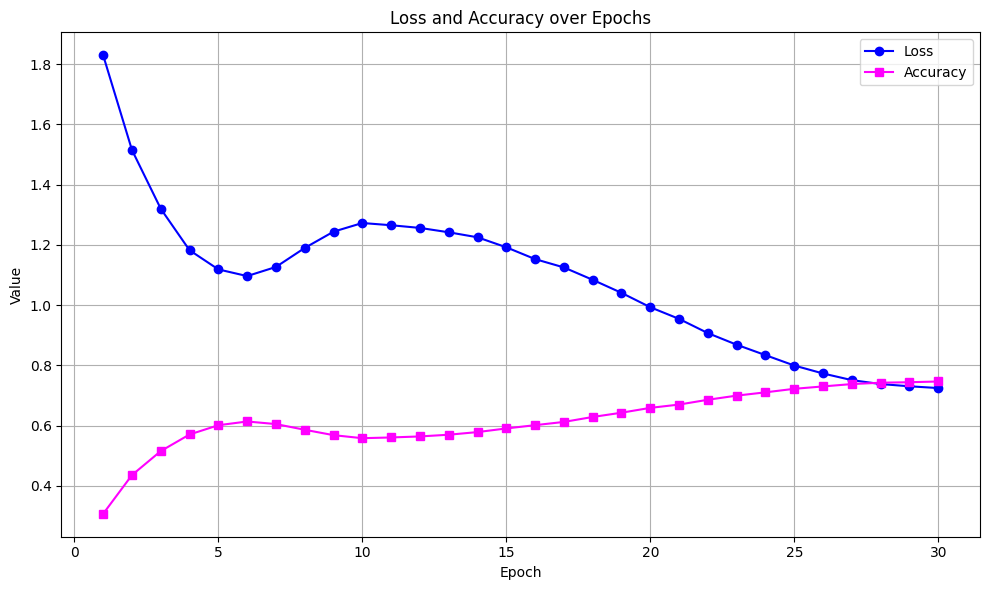

In [28]:
plot_loss_accuracy('experiments\\DeepCNN_30_rotation_translation_128_0.0_0.001_0.003_one_cycle_0.3.csv')

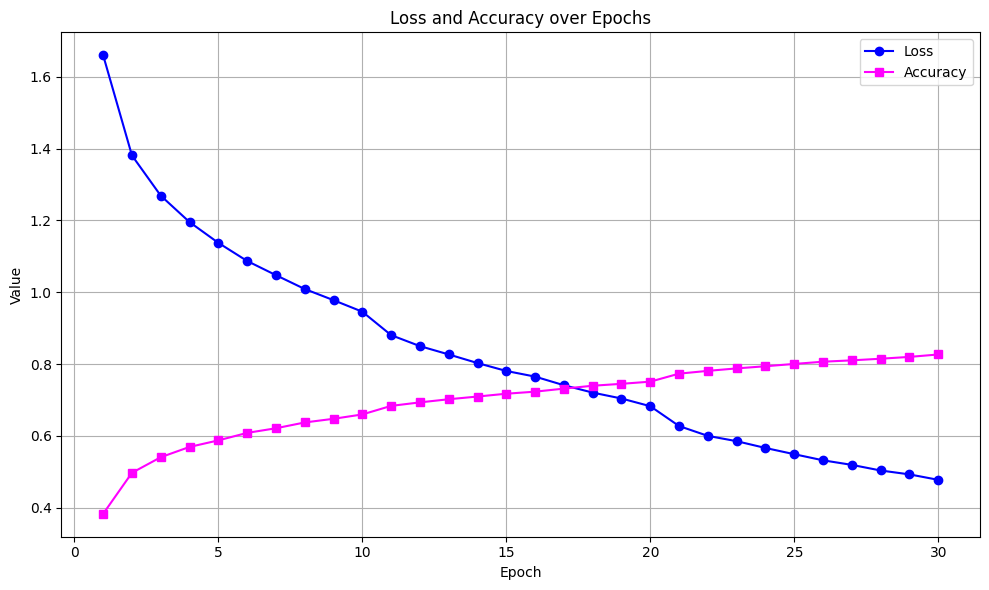

In [29]:
plot_loss_accuracy('experiments\\MLPMixer_30_rotation_translation_128_0.0_0.001_0.003_step_decay_0.3.csv')

In [30]:
def find_max_batch_size(model, input_size, device, start=64, step=64, max_limit=2048):
    batch_size = start
    while batch_size <= max_limit:
        try:
            inputs = torch.randn(batch_size, *input_size).to(device)
            model(inputs)
            batch_size += step
        except RuntimeError as e:
            if "out of memory" in str(e):
                torch.cuda.empty_cache()
                return batch_size - step
            else:
                raise e
    return batch_size


In [33]:
import torch

def find_max_batch_size(model, input_size=(3, 32, 32), device=None, start=64, step=64, max_limit=1024):
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.to(device)
    model.eval()

    batch_size = start
    while batch_size <= max_limit:
        try:
            with torch.no_grad():
                inputs = torch.randn(batch_size, *input_size).to(device)
                outputs = model(inputs)
            print(f"✅ Batch size {batch_size} passed")
            batch_size += step
        except RuntimeError as e:
            if "out of memory" in str(e):
                print(f"❌ Out of memory at batch size = {batch_size}")
                torch.cuda.empty_cache()
                return batch_size - step
            else:
                raise e
    return batch_size

# Użycie z Twoim modelem:
model = DeepCNN()
max_batch = find_max_batch_size(model, input_size=(3, 32, 32), step=64, max_limit=1024)
print(f"\n🔍 Maksymalny stabilny batch size dla Twojego DeepCNN: {max_batch}")


✅ Batch size 64 passed
✅ Batch size 128 passed
✅ Batch size 192 passed
✅ Batch size 256 passed
✅ Batch size 320 passed
✅ Batch size 384 passed
✅ Batch size 448 passed
✅ Batch size 512 passed
✅ Batch size 576 passed
✅ Batch size 640 passed
✅ Batch size 704 passed
✅ Batch size 768 passed
✅ Batch size 832 passed
✅ Batch size 896 passed
✅ Batch size 960 passed
✅ Batch size 1024 passed

🔍 Maksymalny stabilny batch size dla Twojego DeepCNN: 1088


In [32]:
max_batch = find_max_batch_size(model, input_size=(3, 32, 32))


KeyboardInterrupt: 